# Project: Investigate a Dataset (No show appointments - may- 2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

## What do we want to infer from the data?
What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

In [5]:
#importing all packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
in data wrangling we will load data file and we will know about thier properties. 
### General Properties

In [2]:
# Load data amd showing data fram 
df= pd.read_csv("noshowappo.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# showing tuple of the dimensions of the dataframe
df.shape

(110527, 14)

The data contains (110527 rows) and (14 columns)


In [4]:
#showing info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no missing data  

In [5]:
#showing is there duplicates 
df.duplicated().sum()

0

In [6]:
# drop duplicates
df.drop_duplicates(inplace=True)

There is no duplicating data 

In [7]:
df.duplicated().sum()

0

In [8]:
#showing the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [3]:
#showing description of dataset 
df.describe().round(2)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.00,110527.00,110527.0,110527.0,110527.00,110527.00,110527.00,110527.00
mean,1.474963e+14,5675305.12,37.09,0.1,0.2,0.07,0.03,0.02,0.32
std,2.560949e+14,71295.75,23.11,0.3,0.4,0.26,0.17,0.16,0.47
min,3.921784e+04,5030230.00,-1.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,4.172614e+12,5640285.50,18.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,3.173184e+13,5680573.00,37.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,9.439172e+13,5725523.50,55.00,0.0,0.0,0.00,0.00,0.00,1.00
max,9.999816e+14,5790484.00,115.00,1.0,1.0,1.00,1.00,4.00,1.00


Min age is (-1 year) which is mistake(we will remove it )

Them mean age is ( 37 years )

50% of age between (18 : 55 years)

In [10]:
#which row has age = -1
mask = df.query('Age==-1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


there is one row has age = -1 


### Data Cleaning 

In [11]:
#remove the row which has age = -1
df.drop(index=99832 , inplace=True)

In [12]:
# remove columns that we dont need
df.drop(["AppointmentID","ScheduledDay","AppointmentDay"], axis=1, inplace=True)
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Removing the columns that we dont need at our analysis

In [13]:
#Rename Columns
df.rename(columns={"No-show": "No_Show"}, inplace=True)
df.rename(columns={"Hipertension" : "Hypertension"}, inplace=True)
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


changed the name of "hipertension" whis is maistake to "hypertension"

Add "_"  at "no_show"

<a id='eda'></a>
## Exploratory Data Analysis
 Now going to explore data computing statistics and visualizing data 
### General look

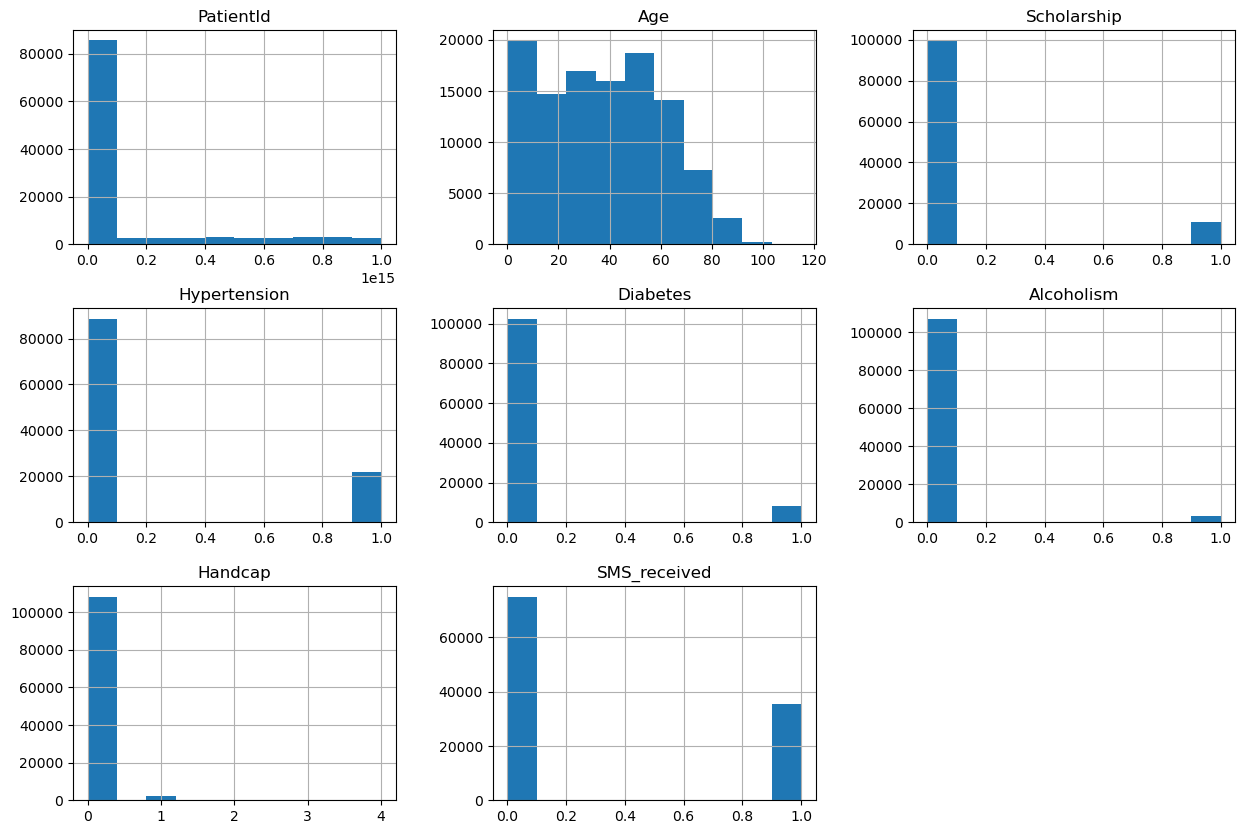

In [14]:
df.hist(figsize=(15,10));


Most patients dont have diabets

A small percentage of patients suffer from hipertension

Patients who didnt receved an sms nearly half of those who did receved 

Most patients havet scholarship

In [30]:
#showing the num. of patients who are showing or not
show=df.No_Show == "No"
No_show=df.No_Show == "Yes"

In [61]:
pd.plotting.scatter_matrix(cl_mov, figsize = (15,15));


AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_chart_proportions'

The number of no show is 232319

The number of yes show is 88207


### Analysis with visuals


In [4]:
# Create a bar chart with proper labels To Compare the 'Attendence status' According To 'Gender'
ax = sns.countplot(x=df.Scholarship, hue=df.No_Show, data=df)
ax.set_title('Attend/Absent for Females and Males')
ax.set_xticklabels(['Females', 'Males'])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'No_Show'

From chart most patients who committed are young and who didnt committed are old patients 

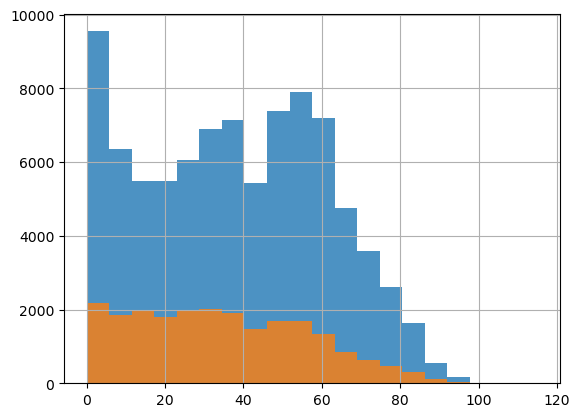

In [66]:
#compare using visualization between show and Gender
df.Age[show].hist(alpha=0.8, bins=20);
df.Age[No_show].hist(alpha=0.8, bins=20);

There is no correlation between showing and gender
(gender is insignificant) 

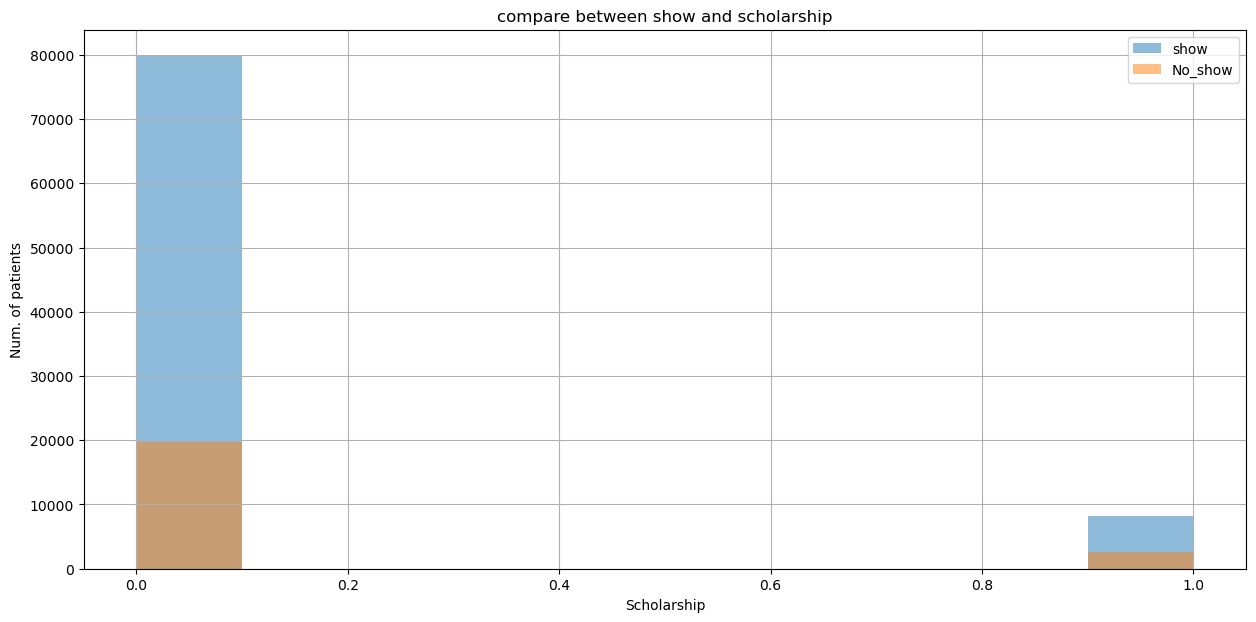

In [91]:
#compare using visualization between show and scholarship
plt.figure(figsize=(15,7))
df.Scholarship[show].hist(alpha= 0.5 , label="show")
df.Scholarship[No_show].hist(alpha=0.5 , label="No_show")
plt.legend()
plt.title("compare between show and scholarship")
plt.xlabel("Scholarship")
plt.ylabel("Num. of patients") ;


There is no correlation between showing and scholarship
(scholarship is insignificant) 

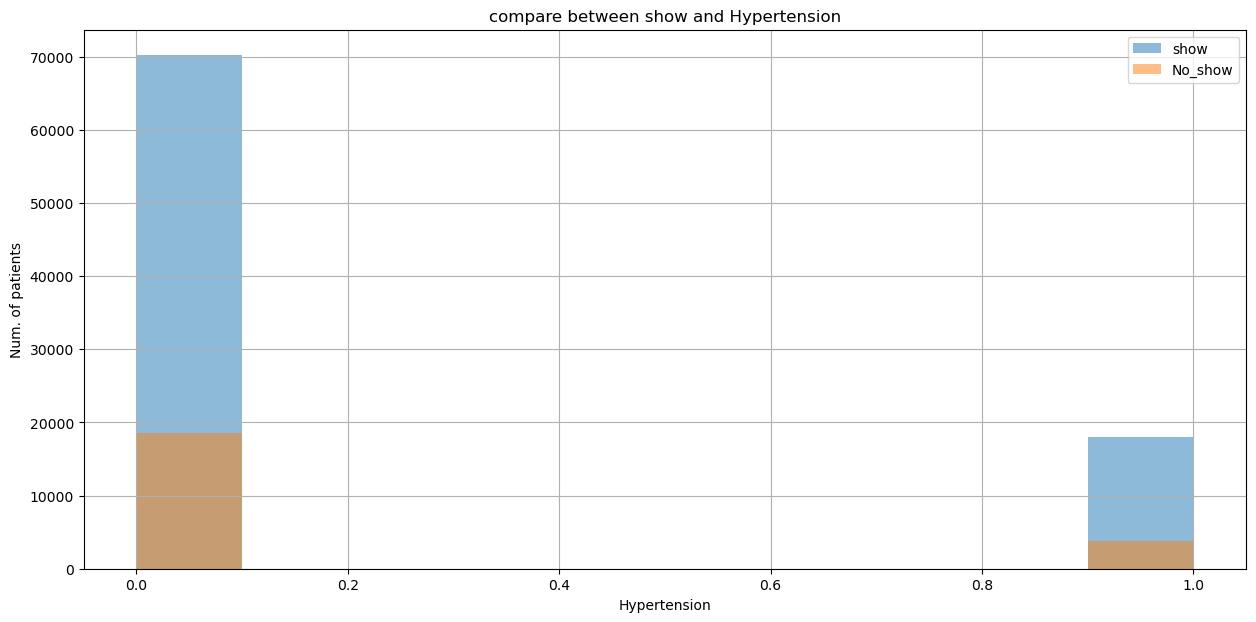

In [92]:
#compare using visualization between show and Hypertension
plt.figure(figsize=(15,7))
df.Hypertension[show].hist(alpha= 0.5 , label="show")
df.Hypertension[No_show].hist(alpha=0.5 , label="No_show")
plt.legend()
plt.title("compare between show and Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Num. of patients") ;

There is no correlation between showing and Hypertension
(Hypertension is insignificant) 

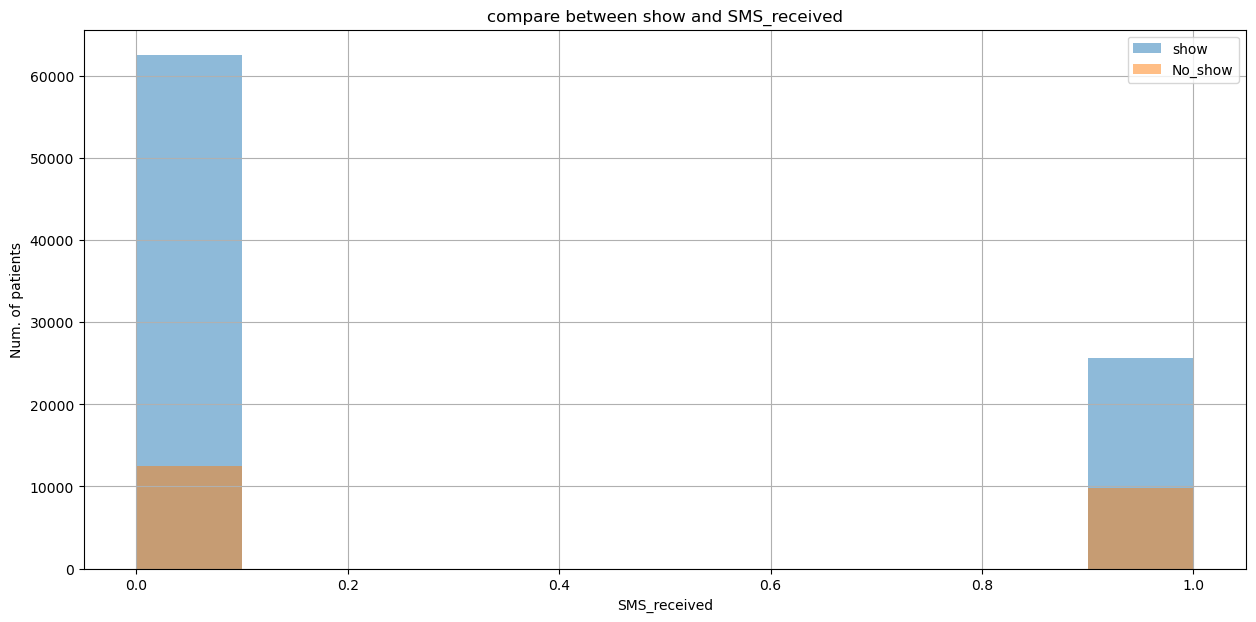

In [93]:
#compare using visualization between show and SMS
plt.figure(figsize=(15,7))
df.SMS_received[show].hist(alpha= 0.5 , label="show")
df.SMS_received[No_show].hist(alpha=0.5 , label="No_show")
plt.legend()
plt.title("compare between show and SMS_received")
plt.xlabel("SMS_received")
plt.ylabel("Num. of patients") ;

The patients who didnt received SMS and attend more than whoe did received 

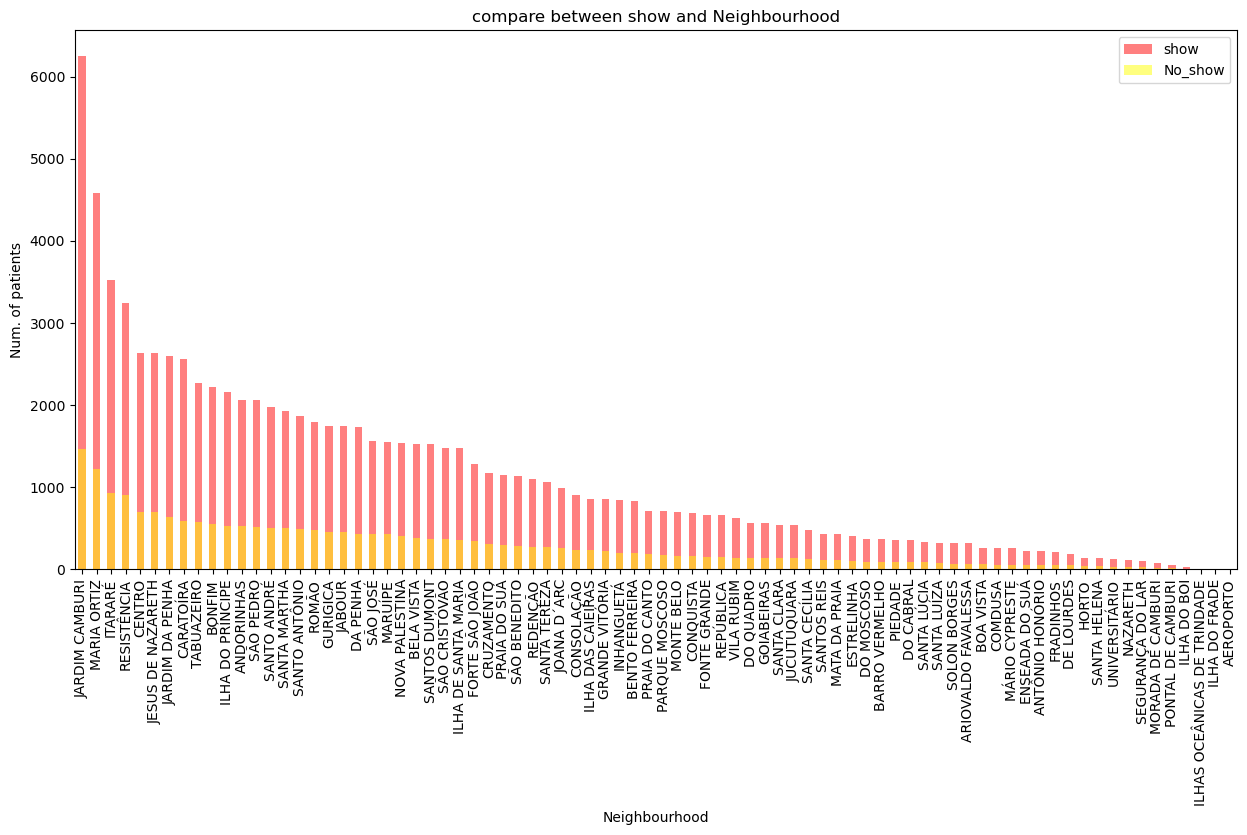

In [94]:
#compare using visualization between show and Neighbourhood
plt.figure(figsize=(15,7))
df.Neighbourhood[show].value_counts().plot(kind="bar" , alpha= 0.5 ,color="red", label="show")
df.Neighbourhood[No_show].value_counts().plot(kind="bar" , alpha= 0.5 ,color="yellow" , label="No_show")
plt.legend()
plt.title("compare between show and Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Num. of patients") ;

Neighbourhood has effect on attendance because one of the citeis has the greatest number of patients and showing 

<a id='conclusions'></a>
## Conclusions
● Neighbourhood has effect on attendance because one of the citeis has the    greatest number of patients and showing 

● Age has effect on attendance because the ages 0:10 has most showing rate     then from 35:55 and then the last attending who above 70 years old

● The patients who didnt received SMS and attend more than whoe did received   and thats weird  

● There is no correlation between showing and (Hypertension , scholarship ,gender )





# limitations

no clear correlation between showing-no_showing and many characters